In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

# 1. 데이터 불러오기


In [3]:
path_전처리 = '/content/drive/MyDrive/교육공공 데이터 분석 공모전/전처리된_data/'

In [4]:
df = pd.read_csv(path_전처리+'/전북_일반고_과목편성통합.csv')
df.head(3)


,과목,과목유형,1학년,2학년,3학년,학교명
0,공통국어1,공통 과목,1,0,0,만경고
1,공통국어2,공통 과목,1,0,0,만경고
2,독서와 작문,일반 선택,0,1,0,만경고


In [5]:
df_info = pd.read_csv(path_전처리 + '(농어촌)전북 고등학교 학생학급수 교원수 위경도.csv')
df_info.head(3)


,행정구,고등학교유형,학교명,일반학급_학급수,일반학급_학생수_계,특수학급_학급수,특수학급_학생수_계,1학년_학급수,2학년_학급수,3학년_학급수,학생수_총계_계,학급당학생수,교원수_총계_계,교원1인당 학생수,위도,경도,주소
0,김제시,특성화고등학교,지평선고등학교,6,73,0,0,2,2,2,73,12.2,18,4.1,35.826349,126.831110,전북특별자치도 김제시 성덕면 성동길 183-4
1,김제시,일반고등학교,김제고등학교,7,139,0,0,3,2,2,139,19.9,22,6.3,35.792049,126.895976,전북특별자치도 김제시 남북2 25
2,김제시,일반고등학교,김제여자고등학교,15,299,2,11,7,5,5,310,18.2,40,7.8,35.799174,126.894063,전북특별자치도 김제시 중앙로 193


#2. 학교별 학생 수 집계
학생학급수_교원수_위경도 데이터에서 학교명과 학생수_총계_계 컬럼만 추출한다

In [6]:
# 학교명과 학생 수만 추출
df_students = df_info[['학교명', '학생수_총계_계']]
df_students.head()

,학교명,학생수_총계_계
0,지평선고등학교,73
1,김제고등학교,139
2,김제여자고등학교,310
3,남원고등학교,351
4,남원여자고등학교,340


#3. 학교별 개설 과목 수 집계
교과목 종류 데이터에서 학교명과 과목명만 추출

In [7]:
# 학교명과 과목명만 추출

df_subjects = df[['과목', '학교명']]

# 학교명 변경 매핑
df_subjects['학교명'] = (
    df_subjects['학교명']
    .str.replace("여고", "여자고")
    .str.replace("고", "고등학교")
)


school_name_map = {
    '남원예고등학교': '남원국악예술고등학교',
    '동국사대부금산고등학교': '동국대학교사범대학부속금산고등학교'
}

# df_subjects에만 적용
df_subjects['학교명'] = df_subjects['학교명'].replace(school_name_map)

# 학교별 고유한 과목 수 세기
subject_count = df_subjects.groupby('학교명')['과목'].nunique().reset_index()
subject_count.columns = ['학교명', '개설과목수']

subject_count

<ipython-input-7-58b0b3207622>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subjects['학교명'] = (
<ipython-input-7-58b0b3207622>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subjects['학교명'] = df_subjects['학교명'].replace(school_name_map)


,학교명,개설과목수
0,군산중앙고등학교,101
1,김제고등학교,82
2,김제서고등학교,64
3,김제여자고등학교,86
4,남원고등학교,87
5,남원서진여자고등학교,86
6,남원여자고등학교,89
7,덕암고등학교,86
8,동국대학교사범대학부속금산고등학교,93
9,만경고등학교,70


#4. 두 데이터를 학교명을 기준으로 병합

In [8]:
# 학생 수 데이터(df_students)와 과목 수 데이터(subject_count)를 학교명을 기준으로 병합
df_merged = pd.merge(df_students, subject_count, on='학교명', how='left')

df_merged


,학교명,학생수_총계_계,개설과목수
0,지평선고등학교,73,NaN
1,김제고등학교,139,82.0
2,김제여자고등학교,310,86.0
3,남원고등학교,351,87.0
4,남원여자고등학교,340,89.0
5,인월고등학교,55,104.0
6,정읍여자고등학교,357,93.0
7,정읍고등학교,252,72.0
8,김제서고등학교,55,64.0
9,남원서진여자고등학교,278,86.0


#5.과목 다양성 지표 계산

In [9]:
df_merged['과목_다양성_지표'] = df_merged['개설과목수'] / df_merged['학생수_총계_계']
df_merged.isnull().sum()
df_merged = df_merged.dropna()
df_merged.describe()
# df_merged.to_csv('/content/drive/MyDrive/교육공공 데이터 분석 공모전/전처리된_data/과목다양성지표.csv', index=False, encoding='utf-8-sig')


,학생수_총계_계,개설과목수,과목_다양성_지표
count,21.000000,21.000000,21.000000
mean,231.333333,84.476190,0.852902
std,156.550737,13.332738,1.252796
min,17.000000,64.000000,0.169748
25%,94.000000,72.000000,0.260504
50%,278.000000,86.000000,0.309353
75%,351.000000,93.000000,0.744681
max,595.000000,115.000000,5.823529


In [12]:
top10 = df_merged.sort_values(by='과목_다양성_지표', ascending=False).head(10)
bottom10 = df_merged.sort_values(by='과목_다양성_지표').head(10)


In [13]:
# 한글 세팅

# 1. 나눔고딕 폰트 설치
!apt-get -qq update
!apt-get -qq install -y fonts-nanum

# 2. 런타임에 폰트 캐시 갱신
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 3. 폰트 이름 확인 후 설정
nanum_font_name = fm.FontProperties(fname=font_files[0]).get_name()
print(f"설정된 폰트 이름: {nanum_font_name}")

# matplotlib에 폰트 반영
mpl.rc('font', family=nanum_font_name)
mpl.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
설정된 폰트 이름: NanumMyeongjo


<ipython-input-14-71cf7d8f5808>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='과목_다양성_지표', y='학교명', palette='Blues_d')


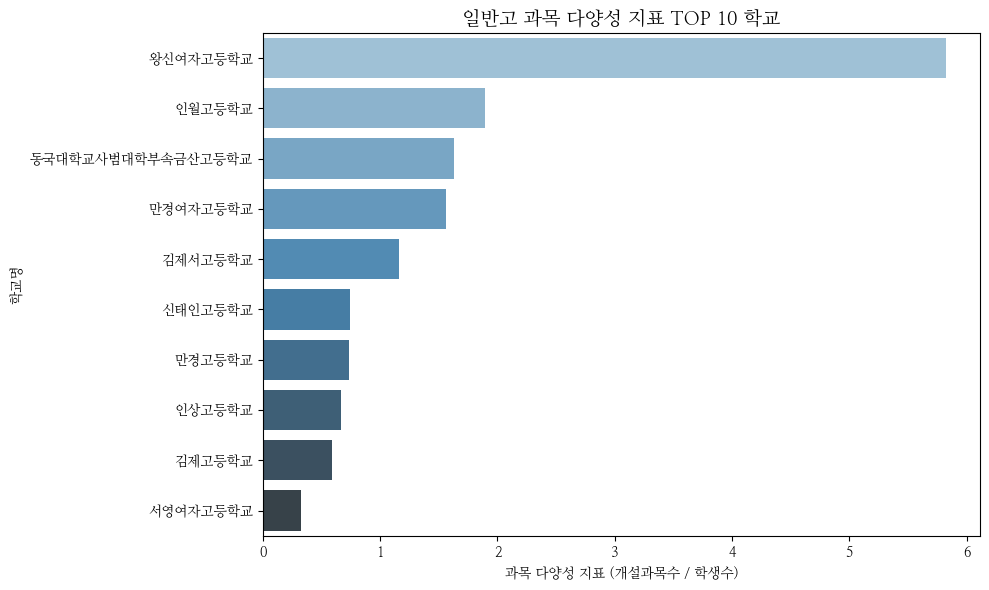

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='과목_다양성_지표', y='학교명', palette='Blues_d')
plt.title('일반고 과목 다양성 지표 TOP 10 학교', fontsize=14)
plt.xlabel('과목 다양성 지표 (개설과목수 / 학생수)')
plt.ylabel('학교명')
plt.tight_layout()
plt.show()


#과목 다양성 지표는 과목선택권의 대략적인 수준을 파악
-학생 수 대비 교육 리소스가 적은 학교를 찾는데 유용
-지도 시각화로 지역 간 선택권 격차를 간단하게 비교할 수 있음



In [27]:
df = pd.read_csv('/content/drive/MyDrive/과목명, 학교명, 군집, 학생수, 교원수, 위도, 경도.csv')

,과목명,학교명,학년,KMeans_4,학생수_총계_계,교원수_총계_계,위도,경도
0,공통국어1,만경고등학교,1학년,0,95,17,35.850069,126.819891
1,공통국어2,만경고등학교,1학년,0,95,17,35.850069,126.819891
2,공통수학1,만경고등학교,1학년,0,95,17,35.850069,126.819891
3,공통수학2,만경고등학교,1학년,0,95,17,35.850069,126.819891
4,공통영어1,만경고등학교,1학년,0,95,17,35.850069,126.819891
...,...,...,...,...,...,...,...,...
2373,인간과 심리,정읍제일고등학교,3학년,2,115,30,35.562168,126.867251
2374,미디어 영어,칠보고등학교,3학년,2,16,10,35.606039,126.992153
2375,스포츠 과학,칠보고등학교,3학년,2,16,10,35.606039,126.992153
2376,스포츠 문화,한국경마축산고등학교,3학년,1,99,19,35.444118,127.538437


#6. 학교 위치별 과목 다양성 지표 시각화

In [38]:
# 학교별 과목 수 집계 (중복 제거 후)
df_merged = df.groupby('학교명')['과목명'].nunique().reset_index()
df_merged.columns = ['학교명', '과목다양성지표']

# 원래 df에서 학교명, 위도, 경도, 군집 정보 병합
school_info = df[['학교명', '위도', '경도', 'KMeans_4']]
map_df = pd.merge(school_info, df_merged, on='학교명')
map_df = map_df[['학교명', '위도', '경도', 'KMeans_4', '과목다양성지표']].drop_duplicates(subset='학교명')

In [37]:
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement



# 중심 좌표
m = folium.Map(location=[35.8, 127.1], zoom_start=8)
marker_cluster = MarkerCluster().add_to(m)

# 시각화
q1 = map_df['과목다양성지표'].quantile(0.33)
q2 = map_df['과목다양성지표'].quantile(0.66)

def get_color(score):
    if score <= q1:
        return 'red'
    elif score <= q2:
        return 'green'
    else:
        return 'blue'

# 지도 생성
center_lat = map_df['위도'].mean()
center_lon = map_df['경도'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=9)
marker_cluster = MarkerCluster().add_to(m)

# 마커 추가
for _, row in map_df.iterrows():
    color = get_color(row['과목다양성지표'])
    folium.CircleMarker(
        location=(row['위도'], row['경도']),
        radius=50,
        popup=(
            f"<b>{row['학교명']}</b><br>"
            f"과목 다양성: {row['과목다양성지표']}<br>"
            f"군집: {row['KMeans_4']}"
        ),
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(marker_cluster)

m

